# Step 1: Importing libraries

In [1]:
import numpy as np

import lux
import sweetviz
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


# Step 2: Dataset loading & Data preprocessing

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
x = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [5]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
display(x)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
display(x)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
y = pd.DataFrame(data = iris.target, columns = ['target'])

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [11]:
y

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

above plot shows there is equal distribution of data for each target variable label

In [12]:
# bookmarked_charts = y.exported  # for this we need to first export required chart from lux toggle
# bookmarked_charts


# Step 3: Splitting the dataset

In [13]:
def split_data(x,y):
    
    # setting required variables to the global so that they can be accessed outside of function
    global x_train, x_test, y_train, y_test
    
    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,\
                                                        random_state=42, stratify = y)

    #checking target variable data % equal in y_train & y_test
    print('checking tarfet label count balance in y_train & y_test')
    print('-'*40)
    print(y_test.value_counts(normalize=True))
    print('-'*40)
    print(y_train.value_counts(normalize=True))

In [14]:
split_data(x,y)

checking tarfet label count balance in y_train & y_test
----------------------------------------
target
2         0.34
1         0.34
0         0.32
dtype: float64
----------------------------------------
target
0         0.34
2         0.33
1         0.33
dtype: float64


# Step 4: Hyperparameter tuning

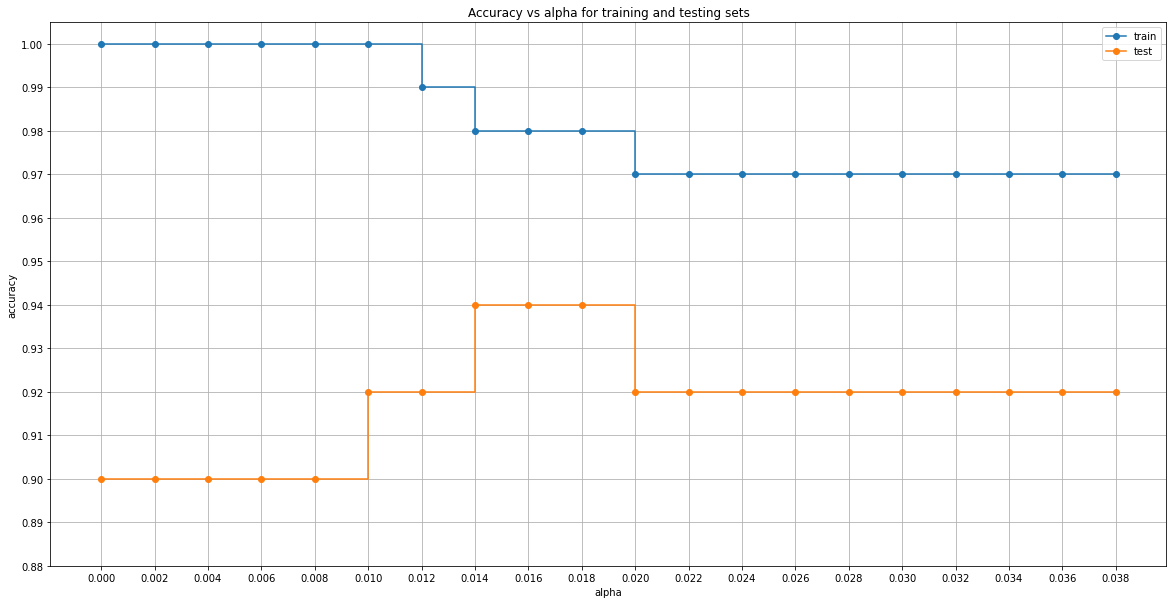

In [15]:
def find_alpha(x_train, x_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    
    ccp_alphas = np.arange(0.000, 0.040, 0.002)
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = RandomForestClassifier(random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        clfs.append(clf)
  
    train_scores = [clf.score(x_train, y_train) for clf in clfs]
    test_scores = [clf.score(x_test, y_test) for clf in clfs]

    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing sets")
    ax.plot(ccp_alphas, train_scores, marker='o', label="train",
            drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker='o', label="test",
            drawstyle="steps-post")
    ax.set_xticks(np.arange(0.000,0.040, 0.002))
    ax.set_yticks(np.arange(0.88,1.01, 0.01))
    ax.legend()
    plt.grid(True)
    plt.rcParams['xtick.labelsize']=12
    plt.rcParams['ytick.labelsize']=12
    plt.show()

find_alpha(x_train, x_test, y_train, y_test)

ccp_alpha=0.014 gives best accuracy for train & test data.

# Step 5: Model Building...

In [16]:
def model_build(x_train, y_train, x_test, y_test):
    
    ccp_alpha_value = float(input('enter ccp_alpha value:'))
    print()
    
    # importing required libraries
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # creating classifier object/instance
    global model
    model = RandomForestClassifier(random_state=42, ccp_alpha = ccp_alpha_value)
    
    # fit model on train datasets
    model.fit(x_train, y_train)
    
    # train & test scores i.e. accuracy
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    # model prediction on x_train & x_test dataset
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    
    # confusion matrix
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)
    
    # classification report
    train_classification = classification_report(y_train, y_train)
    test_classification = classification_report(y_test, y_test)
    
    # TRAIN DATA OUTPUTS..
    print('train_score:', train_score)
    print()
    
    print('CONFUSION MATRIX FOR TRAIN DATA')
    figure1, ax1 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(train_cm, annot=True, ax = ax1)
    plt.show()
    print()
    
    print('Classification report for train data')
    print(train_classification)
    print('-'*60)
    
     # TEST DATA OUTPUTS..
    print('test_score:', test_score)
    print()
    print('CONFUSION MATRIX FOR TEST DATA')
    figure, ax2 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(test_cm, annot=True, ax = ax2)
    plt.show()
    
    print('Classification report for test data')
    print(test_classification)
    print('-'*60)
    

enter ccp_alpha value:0.014

train_score: 0.98

CONFUSION MATRIX FOR TRAIN DATA


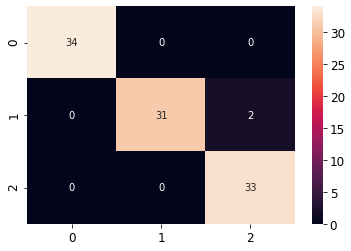

<Figure size 720x576 with 0 Axes>


Classification report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

------------------------------------------------------------
test_score: 0.94

CONFUSION MATRIX FOR TEST DATA


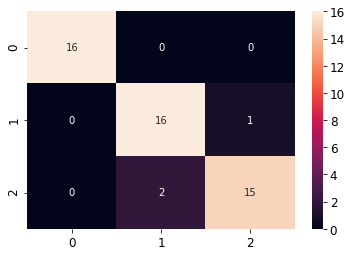

<Figure size 720x576 with 0 Axes>

Classification report for test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

------------------------------------------------------------


In [17]:
model_build(x_train, y_train, x_test, y_test)

# Step 6: Model cross validation.

In [18]:
def model_cross_validation(x, y, cv=5):

    from sklearn import metrics
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model, x, y, cv=5)

    print(scores)
    print()
    print('The mean score and the 95% confidence interval of the score estimate:')
    print()
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

In [19]:
model_cross_validation(x, y)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]

The mean score and the 95% confidence interval of the score estimate:

Accuracy: 0.97 (+/- 0.04)
